El Nino - Does the amount of movement of the buoy affect the reliability of the data?


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# Loading and Manipulate Data

df_nino = pd.read_csv('/content/gdrive/elnino.csv')

# Remove extra space in columns
df_nino.columns = [col.strip() for col in df_nino.columns]

df_nino.head()
df_nino

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


Improvements in the Dataset:

*   Naming features.
*   Changing missing values for NaN.
*   Transforming features to numerical
*   Created new features - Hemisphere(South, North) and Ocean (West Pacific, East Pacific) based on latitude and longitude.



In [5]:
# Naming features

names = list(df_nino.columns)

for i in range(0,12):
    names[i] = names[i].lstrip()

df_nino.columns = names

# Remove missing values
df_nino.replace('.',np.nan,inplace = True)

# Changing features to numerical 
df_nino['Zonal Winds'] = pd.to_numeric(df_nino['Zonal Winds'], errors='coerce')
df_nino['Meridional Winds'] = pd.to_numeric(df_nino['Meridional Winds'], errors='coerce')
df_nino['Humidity'] = pd.to_numeric(df_nino['Humidity'], errors='coerce')
df_nino['Air Temp'] = pd.to_numeric(df_nino['Air Temp'], errors='coerce')
df_nino['Sea Surface Temp'] = pd.to_numeric(df_nino['Sea Surface Temp'], errors='coerce')

## Oceans and Hemispheres
# Oceans - West Pacific Ocean, East Pacific Ocean
df_nino['Ocean'] = df_nino['Longitude'] < 0.0
df_nino['Ocean'].replace([True,False],['West Pacific','East Pacific'],inplace= True)
# Hemisphere
df_nino['Hemisphere'] = df_nino['Latitude'] < 0.0
df_nino['Hemisphere'].replace([True,False],['South','North'],inplace=True)

In [6]:
df_nino

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp,Ocean,Hemisphere
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,NaN,26.14,26.24,West Pacific,South
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,NaN,25.66,25.97,West Pacific,South
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,NaN,25.69,25.28,West Pacific,South
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,NaN,25.57,24.31,West Pacific,South
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,NaN,25.30,23.19,West Pacific,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14,West Pacific,North
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.80,27.87,West Pacific,North
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93,West Pacific,North
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03,West Pacific,North


In [7]:
# Summary statistics of all the columns
print(df_nino.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Observation       178080 non-null  int64  
 1   Year              178080 non-null  int64  
 2   Month             178080 non-null  int64  
 3   Day               178080 non-null  int64  
 4   Date              178080 non-null  int64  
 5   Latitude          178080 non-null  float64
 6   Longitude         178080 non-null  float64
 7   Zonal Winds       152917 non-null  float64
 8   Meridional Winds  152918 non-null  float64
 9   Humidity          112319 non-null  float64
 10  Air Temp          159843 non-null  float64
 11  Sea Surface Temp  161073 non-null  float64
 12  Ocean             178080 non-null  object 
 13  Hemisphere        178080 non-null  object 
dtypes: float64(7), int64(5), object(2)
memory usage: 19.0+ MB
None


EDA and Visualization

Does the amount of movement of the buoy affect the reliability of the data?
And here is some questions which can answer:

1. Does the buoys move ?
2. How many buoys are in the DataSet?
3. How are the buoys distribuited in the Ocean?
4. Are the buoys in some of spacial grid ?
5. How can I evaluate the affect of movement in the reability of data ?

Observation             0
Year                    0
Month                   0
Day                     0
Date                    0
Latitude                0
Longitude               0
Zonal Winds         25163
Meridional Winds    25162
Humidity            65761
Air Temp            18237
Sea Surface Temp    17007
Ocean                   0
Hemisphere              0
dtype: int64


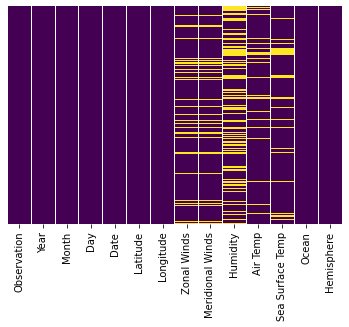

In [9]:
sns.heatmap(df_nino.isnull(),cmap='viridis', cbar=False, yticklabels=False)
print(df_nino.isnull().sum())

Remove the Humidity column and, for now, remove the NaN rows. of SST and Air Temp.

In [10]:
df_nino.drop('Humidity', inplace= True, axis = 1)
df_nino.dropna(subset = ["Air Temp",'Sea Surface Temp'], inplace=True)

### Scatter plot:
Here I think that a scatter plot Long amd Lat might help to understand how the buoys are spacially distribuited in World.

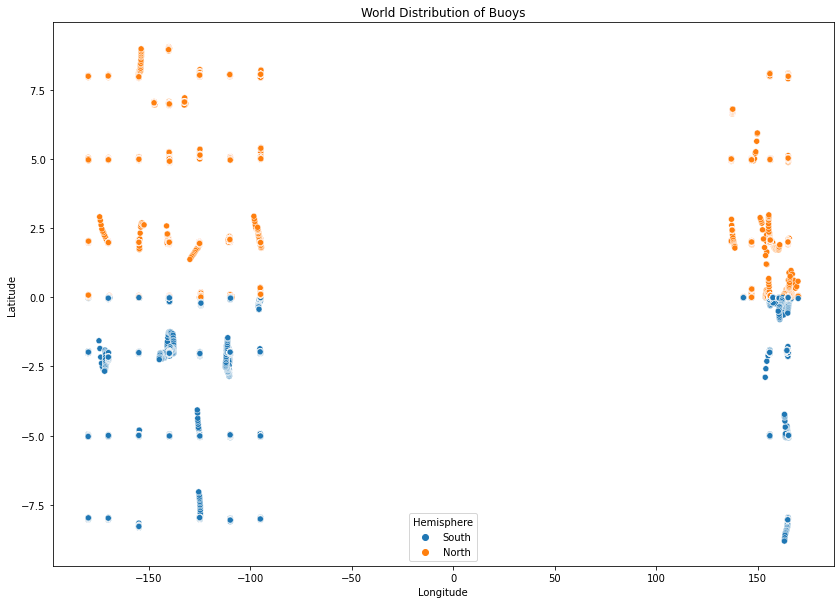

In [11]:
fig = plt.figure(figsize = (14,10))
plt.title('World Distribution of Buoys')
sns.scatterplot(x='Longitude',y= 'Latitude',data=df_nino, hue='Hemisphere')

According to above plot we see that there is  some 'o' Spacial Grid. Where longitude > 0 is East Pacific Ocean and wherer longitude < 0 is West Pacific Ocean.  Hemisphere is highlighted for better understanding.

We can also note that 'West Pacific' have a more equal spaced grid and more buoys than 'East Pacific' Ocean.

We get a closer look - Scatter plot each Ocean.

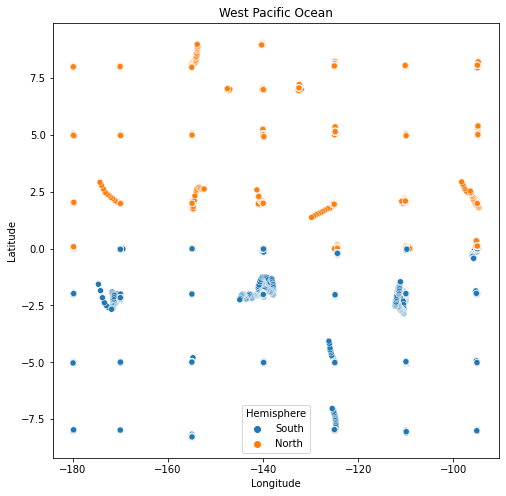

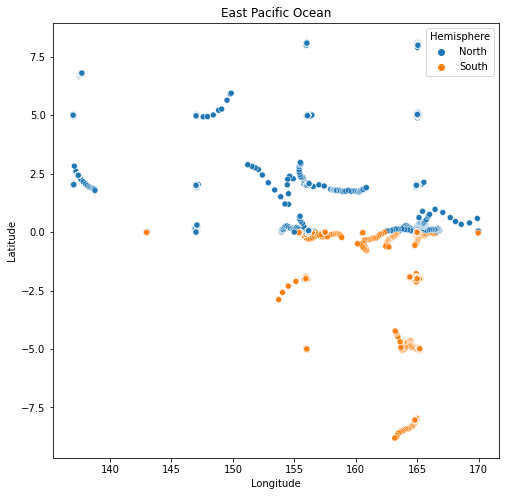

In [18]:
# Scatter plot - West Pacific Ocean
fig1 = plt.figure(figsize = (8,8))
plt.title('West Pacific Ocean')
fig1 = sns.scatterplot(x = 'Longitude',y = 'Latitude',data=df_nino[df_nino['Ocean']=='West Pacific'],hue='Hemisphere')

# Scatter plot - East Pacific Ocean
fig2 = plt.figure(figsize = (8,8))
plt.title('East Pacific Ocean')
fig2 = sns.scatterplot(x = 'Longitude',y = 'Latitude',data=df_nino[df_nino['Ocean']!='West Pacific'],hue='Hemisphere')

From above scatter plots graphs we see that the buoys moves and to note that the 'Latitude' axis is equal for both oceans. Buoy variation is observed between latitude 2.5 and -2.5 in both oceans.

Few more interpretations for Pacific and Indian oceans

Pacific Ocean:

* More equal and larger spacial distributed of buoys
* Which means more observations
* Longitude Variance about 90 degrees

Indian Ocean:
* Fewer grid of buoys and less equal spacially distributed
* Movement of the buoys seems more
* Longitude Variance about 40 degrees

## Distribution plots
Let's see the distribuition plots from  Latitude of Longitude.

This might help me to understand the spacial distribution of the buoy along both of axis.

Text(0.5, 1.0, 'West Pacific Ocean')

<Figure size 1008x720 with 0 Axes>

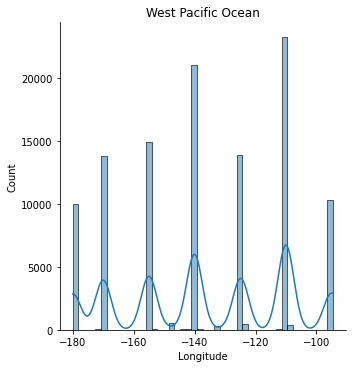

In [21]:
# West Pacific ocean
fig1 = plt.figure(figsize = (14,10))
aux = df_nino[df_nino['Longitude'] < 0]
lon_p = aux['Longitude']
sns.displot(lon_p, kde=True)
plt.title('West Pacific Ocean')

Text(0.5, 1.0, 'East Pacific Ocean')

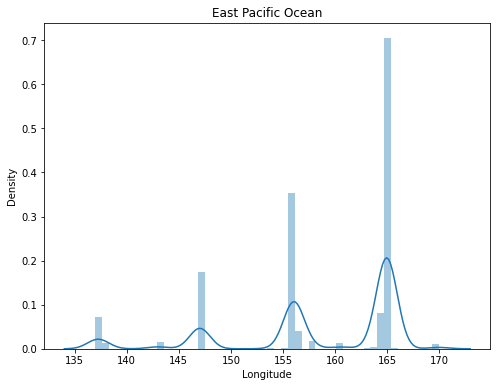

In [22]:
# East Pacific Ocean
fig2 = plt.figure(figsize = (8,6))
aux2 = df_nino[df_nino['Longitude'] > 0]
lon_i = aux2['Longitude']
sns.distplot(lon_i, kde=True)
plt.title('East Pacific Ocean')

Here, we can see the distributions of observation along the longitude for each Ocean. We see that has around 7 peaks of the distribution in the West Pacific Ocean and around 4 in the East Pacific Ocean. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109212 entries, 0 to 178079
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Observation       109212 non-null  int64  
 1   Year              109212 non-null  int64  
 2   Month             109212 non-null  int64  
 3   Day               109212 non-null  int64  
 4   Date              109212 non-null  int64  
 5   Latitude          109212 non-null  float64
 6   Longitude         109212 non-null  float64
 7   Zonal Winds       98244 non-null   float64
 8   Meridional Winds  98244 non-null   float64
 9   Air Temp          109212 non-null  float64
 10  Sea Surface Temp  109212 non-null  float64
 11  Ocean             109212 non-null  object 
 12  Hemisphere        109212 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 11.7+ MB
None


<Figure size 1008x720 with 0 Axes>

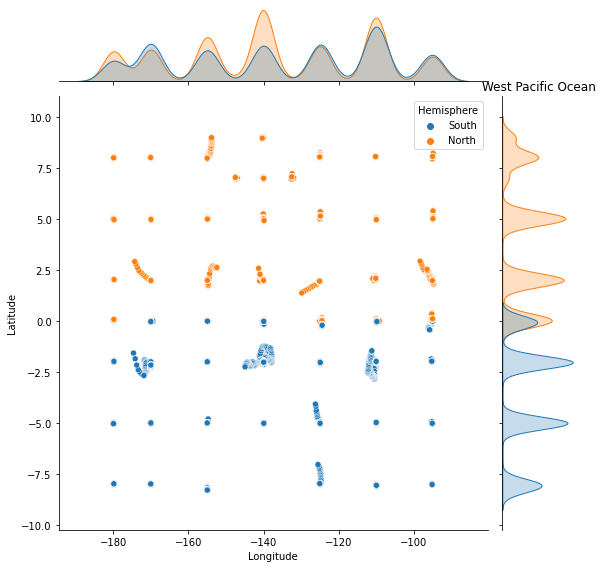

In [23]:
# West Pacific Ocean Visualization

fig = plt.figure(figsize = (14,10))
sns.jointplot(x="Longitude", y="Latitude", data=aux,hue = 'Hemisphere',kind = 'scatter', height=8)
plt.title('West Pacific Ocean')
print(aux.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39744 entries, 15098 to 169263
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Observation       39744 non-null  int64  
 1   Year              39744 non-null  int64  
 2   Month             39744 non-null  int64  
 3   Day               39744 non-null  int64  
 4   Date              39744 non-null  int64  
 5   Latitude          39744 non-null  float64
 6   Longitude         39744 non-null  float64
 7   Zonal Winds       32012 non-null  float64
 8   Meridional Winds  32012 non-null  float64
 9   Air Temp          39744 non-null  float64
 10  Sea Surface Temp  39744 non-null  float64
 11  Ocean             39744 non-null  object 
 12  Hemisphere        39744 non-null  object 
dtypes: float64(6), int64(5), object(2)
memory usage: 4.2+ MB
None


<Figure size 1008x720 with 0 Axes>

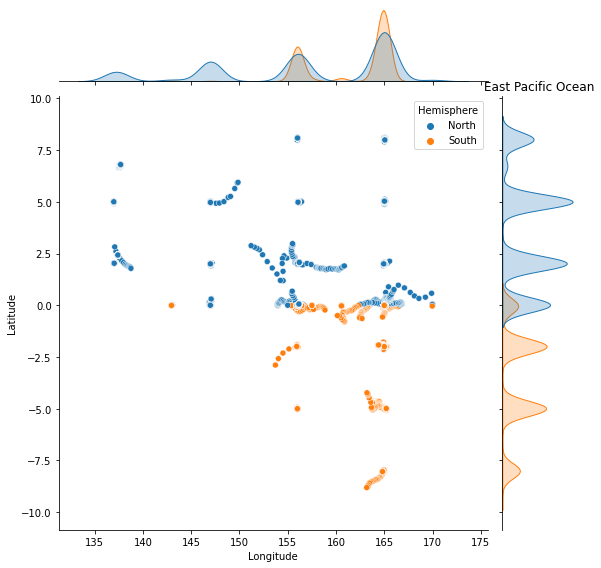

In [24]:
# East Pacific Ocean Visualization

fig = plt.figure(figsize = (14,10))
sns.jointplot(x="Longitude", y="Latitude", data=aux2 ,hue = 'Hemisphere',kind = 'scatter', height=8)
plt.title('East Pacific Ocean')
print(aux2.info())

Text(0.5, 1.0, 'West Pacific Ocean - Number of Observation per year')

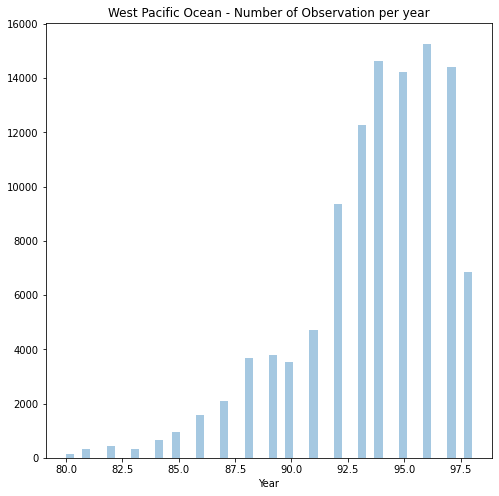

In [29]:
# West Pacific Ocean - Observations
ax = plt.figure(figsize = (8,8))
ax = sns.distplot(aux['Year'], kde = False)
plt.title('West Pacific Ocean - Number of Observation per year')

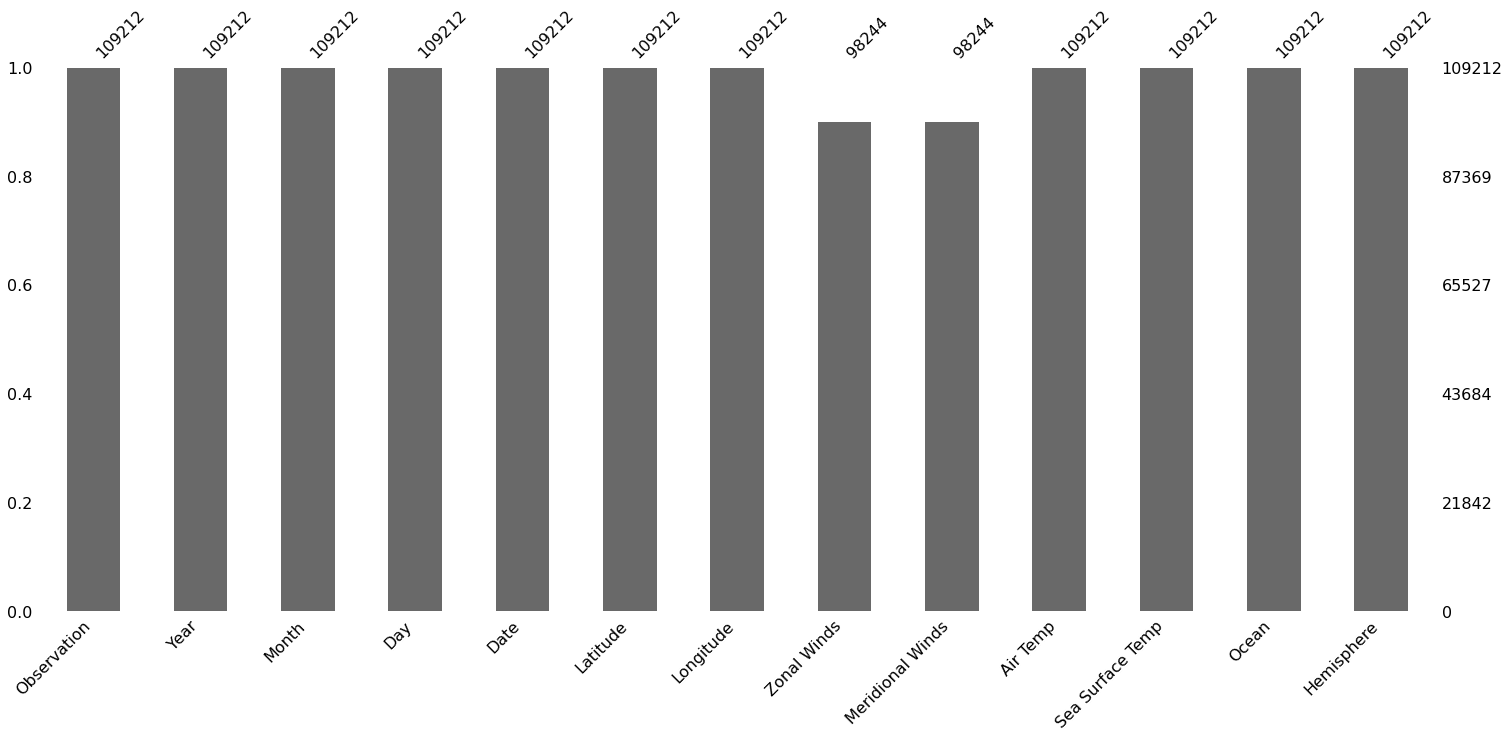

In [26]:
# West Pacific Ocean missing observations from all features(attributes)
import missingno as msno
# show the number of missing values using visualization
msno.bar(aux)

West Pacific Ocean:
1. 48 buoys and 109,212 observations.
2. Zonal Winds and Meridional Winds have about 10% of missing data. We have to make a not here movement of buoy was less compared to East Pacific ocean.



Text(0.5, 1.0, 'East Pacific Ocean - Number of Observation per year')

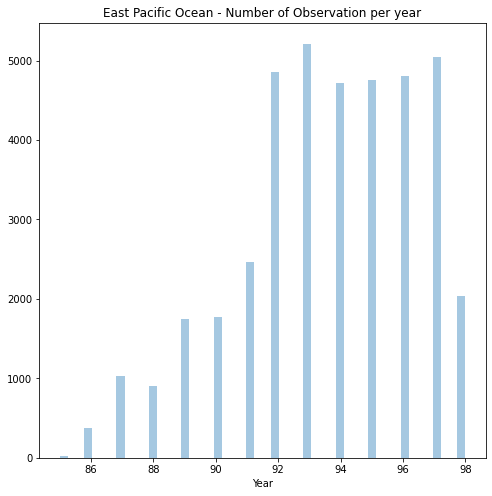

In [28]:
# East Pacific Ocean - Observations
ax = plt.figure(figsize = (8,8))
ax = sns.distplot(aux2['Year'], kde = False)
plt.title('East Pacific Ocean - Number of Observation per year')

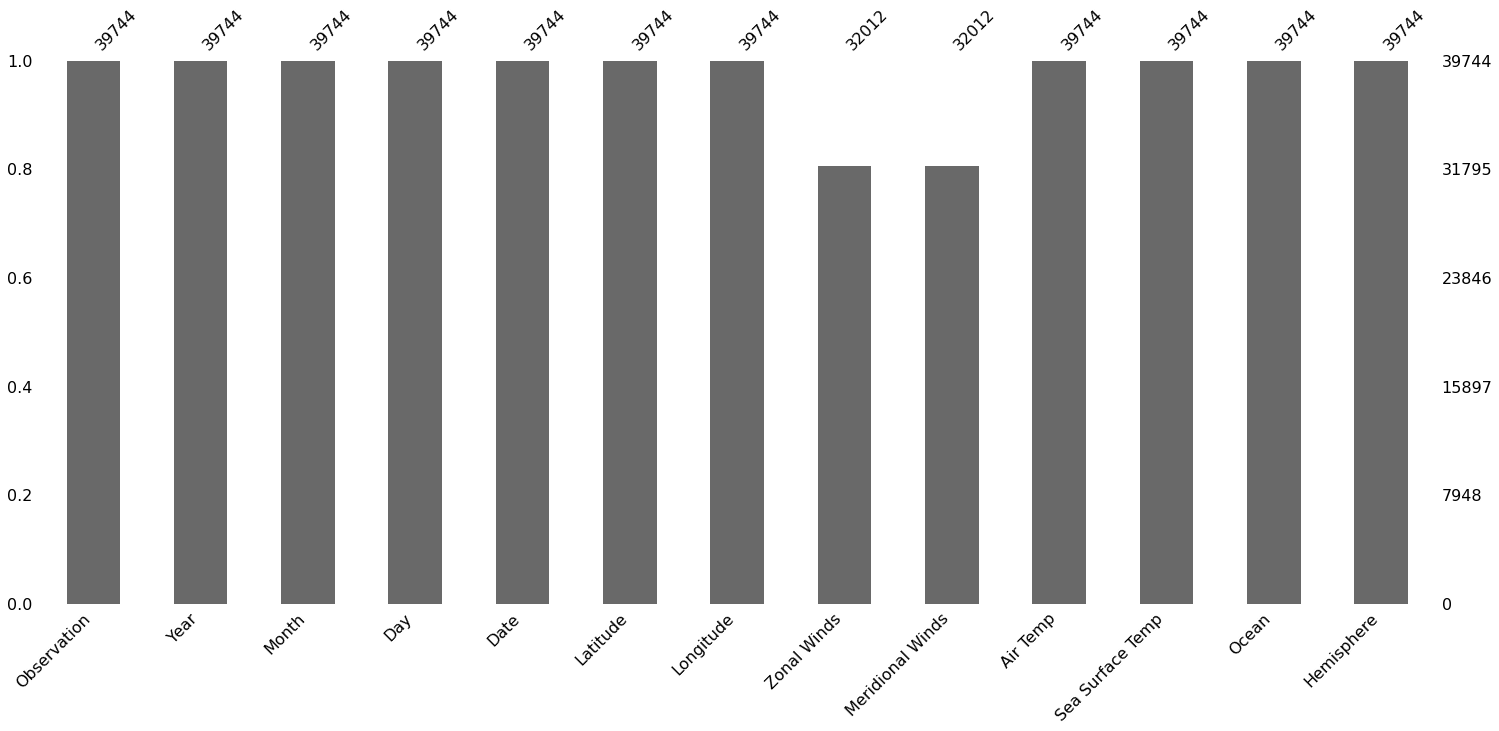

In [30]:
# East Pacific Ocean missing observations from all features(attributes)
import missingno as msno
# show the number of missing values using visualization
msno.bar(aux2)

East Pacific Ocean:
1. Zonal and Meridional winds missing values are about 20% of observations.



Features correlation for both Oceans

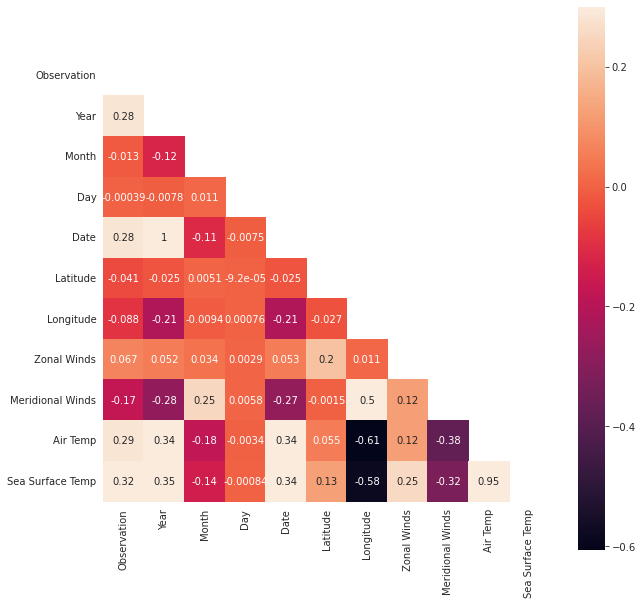

In [43]:
# West Pacific ocean - Feature Correlation
mask = np.zeros_like(aux.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(aux.corr(), annot = True, mask=mask, vmax=.3, square=True)
    

We observed that movement of bouys in West Pacific Ocean is less. This correlation relation between the features might give some insights on data reliability:

* Positive correlation is observed between  'Air Temp' and 'Sea Surface Temp', with 0.95.
* Positive correlation(0.25) between 'Zonal Winds' and 'Sea Surface Temp'

* Latitude have a positive correlation of 0.2 with Zonal Winds and 0.13 with Sea Surface Temp. There greater correlation for Latitude with Zonal Winds, Meridional Winds, Air Temp and Sea Surface Temp
* Longitude have a correlation of 0.5 for Meridional Winds which is positive but negative correlation of -0.61 for Air Temp, -0.58 for Sea Surface Temp



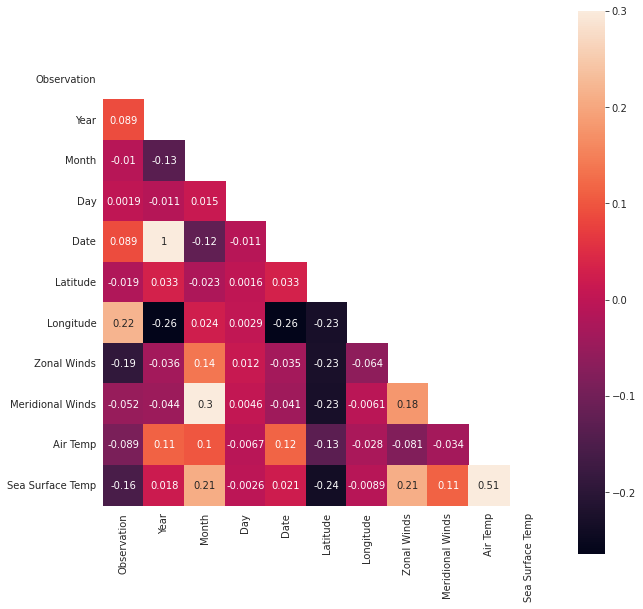

In [42]:
# East Pacific Ocean - Feature Correlation
mask = np.zeros_like(aux2.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 10))
    ax = sns.heatmap(aux2.corr(), annot = True, mask=mask, vmax=.3, square=True)

We observed that movement of bouys in East Pacific Ocean is much more than the West Pacific ocean and here we analyse the data reliability of the buoys.

* Positive correlation is observed between  'Air Temp' and 'Sea Surface Temp', with 0.51.
* Positive correlation (0.21) is observed between 'Zonal Wind' and 'Sea Surface Temp' which slightly less than the West Pacific value.

* Latitude have a correlation of -0.23 with Zonal Winds and others. Here we can see much greater negative correlation for Latitude.
* Similarly, Longitude have a correlation of -0.028 for Air Temp, -0.0089 for Sea Surface Temp and -0.0061 for Meridional Winds which indicates negative correlation with the winds and temperatures.




Let's see some graphics that show the relation between this features.

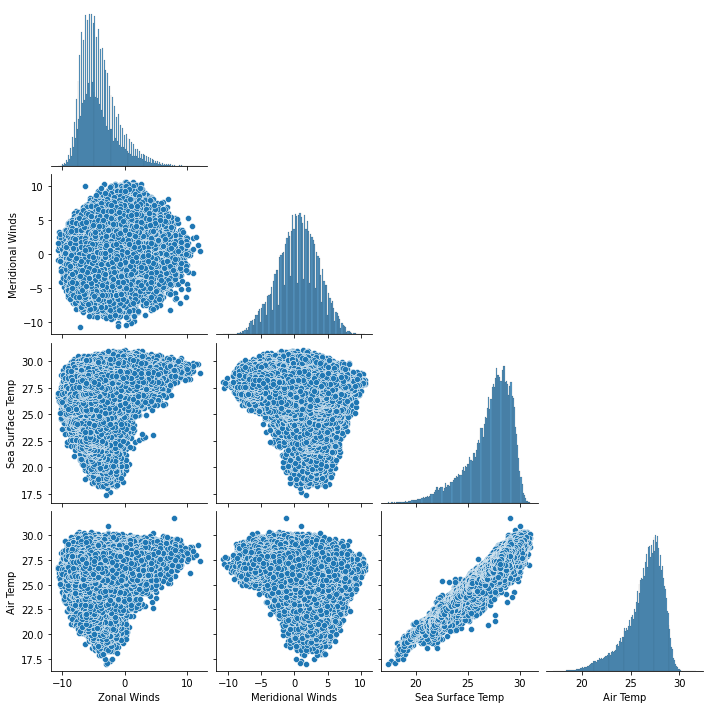

In [ ]:
# West Pacific ocean - Pairplot
sns.pairplot(
    aux,
    x_vars=["Zonal Winds","Meridional Winds", "Sea Surface Temp", "Air Temp"],
    y_vars=["Zonal Winds","Meridional Winds", "Sea Surface Temp", "Air Temp"],
    corner = True
)

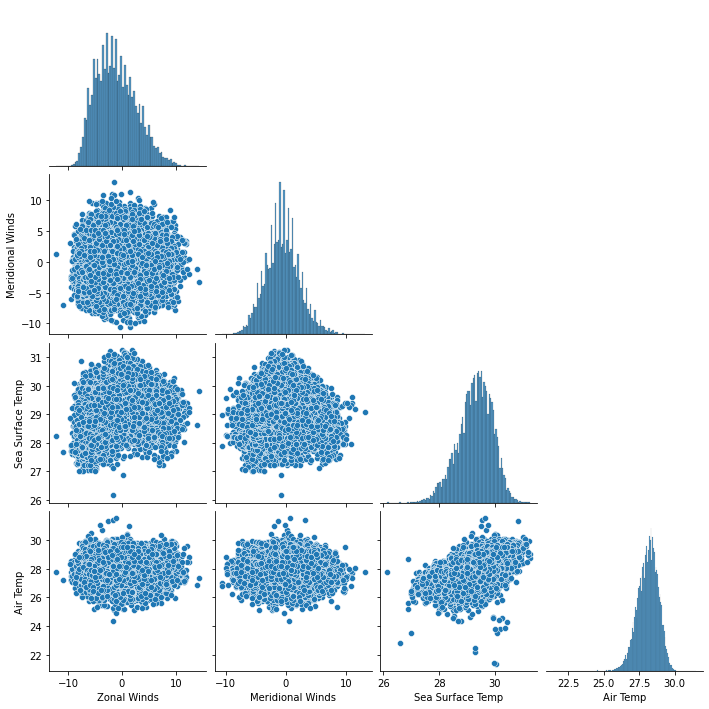

In [44]:
# East Pacific ocean - Pairplot
sns.pairplot(
    aux2,
    x_vars=["Zonal Winds","Meridional Winds", "Sea Surface Temp", "Air Temp"],
    y_vars=["Zonal Winds","Meridional Winds", "Sea Surface Temp", "Air Temp"],
    corner = True
)

<Figure size 576x576 with 0 Axes>

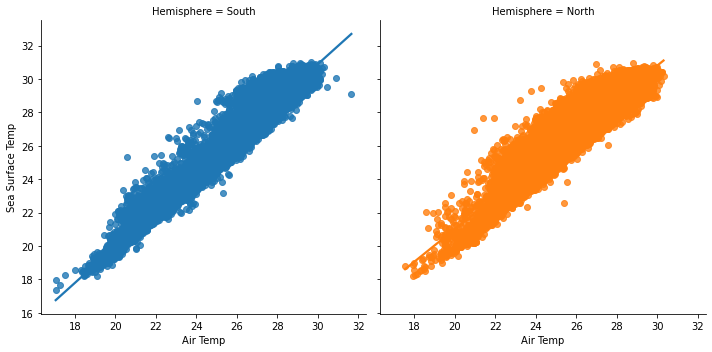

In [45]:
# West Pacific Ocean - Air temp and Sea surface temp plots
ax = plt.figure(figsize = (8,8))
ax = sns.lmplot(x = 'Air Temp',y = 'Sea Surface Temp',data=aux, col = 'Hemisphere', hue='Hemisphere')

<Figure size 576x576 with 0 Axes>

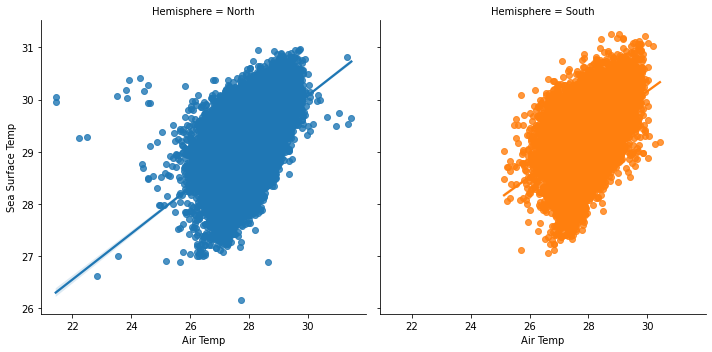

In [40]:
# East Pacific Ocean - Air temp and Sea surface temp plots

ax = plt.figure(figsize = (8,8))
ax = sns.lmplot(x = 'Air Temp',y = 'Sea Surface Temp',data=aux2, col = 'Hemisphere', hue='Hemisphere')